In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [4]:
train = pd.read_csv('input/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('input/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [52]:
both = pd.concat([train.drop('Survived', axis=1), test])

In [57]:
both['Cabin'].fillna(value='', inplace=True)
both['Deck'] = 'None'
both['Deck'] = both[both['Cabin'].isnull()==False]['Cabin'].apply(lambda cabin: cabin[0] if cabin != '' else 'None')
both.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S,None
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S,None
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S,None


In [58]:
both['Deck'].value_counts()

None    1014
C         94
B         65
D         46
E         41
A         22
F         21
G          5
T          1
Name: Deck, dtype: int64

In [59]:
both.groupby(by='Deck')['Pclass'].value_counts()

Deck  Pclass
A     1          22
B     1          65
C     1          94
D     1          40
      2           6
E     1          34
      2           4
      3           3
F     2          13
      3           8
G     3           5
None  3         693
      2         254
      1          67
T     1           1
Name: Pclass, dtype: int64

In [60]:
both.groupby(by='Pclass')['Deck'].value_counts()

Pclass  Deck
1       C        94
        None     67
        B        65
        D        40
        E        34
        A        22
        T         1
2       None    254
        F        13
        D         6
        E         4
3       None    693
        F         8
        G         5
        E         3
Name: Deck, dtype: int64

In [61]:
train['Cabin'].fillna(value='', inplace=True)
train['Deck'] = 'None'
train['Deck'] = train[train['Cabin'].isnull()==False]['Cabin'].apply(lambda cabin: cabin[0] if cabin != '' else 'None')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S,None
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S,None


In [70]:
train.groupby('Deck')['Survived'].value_counts()

Deck  Survived
A     0             8
      1             7
B     1            35
      0            12
C     1            35
      0            24
D     1            25
      0             8
E     1            24
      0             8
F     1             8
      0             5
G     0             2
      1             2
None  0           481
      1           206
T     0             1
Name: Survived, dtype: int64

In [102]:
survived_per = pd.DataFrame({'Survived %': (train.groupby('Deck')['Survived'].value_counts() / train.groupby('Deck')['Survived'].count() * 100).round()})
survived_per.reset_index()

,Deck,Survived,Survived %
0,A,0,53.0
1,A,1,47.0
2,B,1,74.0
3,B,0,26.0
4,C,1,59.0
5,C,0,41.0
6,D,1,76.0
7,D,0,24.0
8,E,1,75.0
9,E,0,25.0


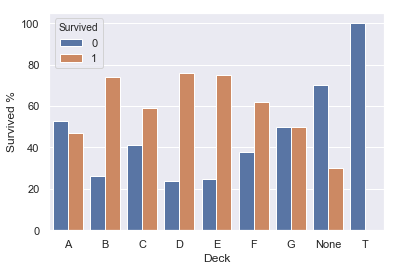

In [113]:
sns.barplot(data=survived_per.reset_index(), x='Deck', y='Survived %', hue='Survived')

Analysis:
- Deck A - 1st class, average survival rate - would put with AC (106)
- Deck B - 1st class, highest survival rate - would put with BT (66)
- Deck C - 1st class, high survival rate - would put with AC
- Deck T - 1st class, only 1 passenger! - would put with BT
- Deck D - 1st and 2nd class - highest survival rate - would put with DE (87)
- E - all classes - highest survival rate - would put with DE
- F - classes 2 & 3, high survival rate, very small category - would put together with FG (26)
- G - only class 3, average survival rate, very small category.  - would put together with FG
- Most people in class 2 and 3 didn't have a known Deck

In [131]:
print('Number of ticket frequencies - similar to family but maybe traveling in groups that are not family')
train.groupby('Ticket')['Ticket'].transform('count').head(10)

Number of ticket frequencies - similar to family but maybe traveling in groups that are not family


0    1
1    1
2    1
3    2
4    1
5    1
6    1
7    4
8    3
9    2
Name: Ticket, dtype: int64

In [133]:
print('Difference between family number and ticket frequency:')
(train['SibSp'] + train['Parch'] + 1 - train.groupby('Ticket')['Ticket'].transform('count')).describe()

Difference between family number and ticket frequency:


count    891.000000
mean       0.116723
std        1.080918
min       -6.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
dtype: float64

In [144]:
def extract_lastname(full_name):
    return full_name.split(',')[0]

In [148]:
train['Last name'] = train['Name'].apply(extract_lastname)
train['Last name'].value_counts().head()

Andersson    9
Sage         7
Skoog        6
Johnson      6
Goodwin      6
Name: Last name, dtype: int64

In [152]:
train.groupby(by='Last name')['Survived'].sum().sort_values(ascending=False).head()

Last name
Carter     4
Baclini    4
Johnson    3
Asplund    3
Kelly      3
Name: Survived, dtype: int64

In [153]:
train.groupby(by='Last name')['Survived'].sum() / train.groupby(by='Last name')['Survived'].count()

Last name
Abbing              0.000000
Abbott              0.500000
Abelson             0.500000
Adahl               0.000000
Adams               0.000000
Ahlin               0.000000
Aks                 1.000000
Albimona            1.000000
Alexander           0.000000
Alhomaki            0.000000
Ali                 0.000000
Allen               0.500000
Allison             0.333333
Allum               0.000000
Andersen-Jensen     1.000000
Anderson            1.000000
Andersson           0.222222
Andreasson          0.000000
Andrew              0.000000
Andrews             0.500000
Angle               1.000000
Appleton            1.000000
Arnold-Franchi      0.000000
Artagaveytia        0.000000
Asim                0.000000
Asplund             0.750000
Astor               1.000000
Attalah             0.000000
Aubart              1.000000
Augustsson          0.000000
                      ...   
Wells               1.000000
West                0.666667
Wheadon             0.000000
Whit

In [173]:
train['Known family survived %'] = train.groupby(by='Last name')[['Survived']].transform('sum') / train.groupby(by='Last name')[['Survived']].transform('count')
train.sort_values(by='Last name').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title,Last name,Known family survived,Known family survived %
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,,S,None,Mr,Abbing,0.0,0.0
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,,S,None,Miss/Mrs/Ms,Abbott,0.5,0.5
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,,S,None,Mr,Abbott,0.5,0.5
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.00,,C,None,Miss/Mrs/Ms,Abelson,0.5,0.5
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.00,,C,None,Mr,Abelson,0.5,0.5


In [176]:
train['Known ticket survived %'] = train.groupby(by='Ticket')[['Survived']].transform('sum') / train.groupby(by='Ticket')[['Survived']].transform('count')
train.sort_values(by='Ticket').head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title,Last name,Known family survived,Known family survived %,Known ticket survived %
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S,B,Miss/Mrs/Ms,Maioni,1.000000,1.000000,1.000000
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S,B,Miss/Mrs/Ms,Cherry,1.000000,1.000000,1.000000
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S,B,Miss/Mrs/Ms,Rothes,1.000000,1.000000,1.000000
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,E67,S,E,Mr,Taussig,0.666667,0.666667,0.666667
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,E67,S,E,Miss/Mrs/Ms,Taussig,0.666667,0.666667,0.666667
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.6500,E68,S,E,Miss/Mrs/Ms,Taussig,0.666667,0.666667,0.666667
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0000,C110,S,C,Mr,Porter,0.000000,0.000000,0.000000
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S,A,Mr,Clifford,0.000000,0.000000,0.000000
430,431,1,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.0,0,0,110564,26.5500,C52,S,C,Mr,Bjornstrom-Steffansson,1.000000,1.000000,1.000000
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C,D,Miss/Mrs/Ms,Warren,1.000000,1.000000,1.000000


In [178]:
train['Known family survived %'].describe()

count    891.000000
mean       0.383838
std        0.442167
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Known family survived %, dtype: float64

In [179]:
train['Known ticket survived %'].describe()

count    891.000000
mean       0.383838
std        0.451338
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Known ticket survived %, dtype: float64

In [177]:
(train['Known family survived %'] - train['Known ticket survived %']).describe()

count    8.910000e+02
mean    -9.968332e-19
std      1.490114e-01
min     -7.777778e-01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.500000e-01
dtype: float64

In [181]:
train['Known family/ticket survived %'] = (train['Known family survived %'] + train['Known ticket survived %'])/2
train['Known family/ticket survived %'].describe()

count    891.000000
mean       0.383838
std        0.440520
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Known family/ticket survived %, dtype: float64

In [183]:
test['Last name'] = test['Name'].apply(extract_lastname)

In [256]:
def get_survive_rate(person, known_last_names, known_tickets):
    name_survive = np.NaN
    ticket_survive = np.NaN
    if person['Last name'] in known_last_names:
        name_survive = train[train['Last name'] == person['Last name']]['Known family survived %'].median()
    
    if person['Ticket'] in known_tickets:
        ticket_survive = train[train['Ticket'] == person['Ticket']]['Known ticket survived %'].median()
        
    if ((np.isnan(name_survive) == False) and (np.isnan(ticket_survive) == False)):
        print(f'Both not empty last_name: "{person["Last name"]}", ticket: "{person["Ticket"]}", name_survive: {name_survive}, ticket_survive: {ticket_survive}')
        survive_rate = (name_survive + ticket_survive) / 2
    else:
        print(f'At least one empty: "{person["Last name"]}", ticket: "{person["Ticket"]}", name_survive: {name_survive}, ticket_survive: {ticket_survive}')
        survive_rate = name_survive if (name_survive != np.NaN) else ticket_survive
    return survive_rate

In [257]:
test['Known family/ticket survived %'] = np.NaN 
known_last_names = train['Last name'].unique()
known_tickets = train['Ticket'].unique()

for i in range(test.shape[0]):
    test.loc[i,'Known family/ticket survived %'] = get_survive_rate(test.loc[i], known_last_names, known_tickets)
test.head(10)

At least one empty: "Kelly", ticket: "330911", name_survive: 0.75, ticket_survive: nan
At least one empty: "Wilkes", ticket: "363272", name_survive: nan, ticket_survive: nan
At least one empty: "Myles", ticket: "240276", name_survive: nan, ticket_survive: nan
At least one empty: "Wirz", ticket: "315154", name_survive: nan, ticket_survive: nan
Both not empty last_name: "Hirvonen", ticket: "3101298", name_survive: 1.0, ticket_survive: 1.0
At least one empty: "Svensson", ticket: "7538", name_survive: 0.0, ticket_survive: nan
At least one empty: "Connolly", ticket: "330972", name_survive: 1.0, ticket_survive: nan
Both not empty last_name: "Caldwell", ticket: "248738", name_survive: 1.0, ticket_survive: 1.0
At least one empty: "Abrahim", ticket: "2657", name_survive: nan, ticket_survive: nan
Both not empty last_name: "Davies", ticket: "A/4 48871", name_survive: 0.3333333333333333, ticket_survive: 0.0
At least one empty: "Ilieff", ticket: "349220", name_survive: nan, ticket_survive: nan
At l

Both not empty last_name: "Murphy", ticket: "36568", name_survive: 1.0, ticket_survive: 0.0
Both not empty last_name: "Danbom", ticket: "347080", name_survive: 0.0, ticket_survive: 0.0
Both not empty last_name: "Astor", ticket: "PC 17757", name_survive: 1.0, ticket_survive: 0.75
Both not empty last_name: "Quick", ticket: "26360", name_survive: 1.0, ticket_survive: 1.0
At least one empty: "Andrew", ticket: "C.A. 34050", name_survive: 0.0, ticket_survive: nan
At least one empty: "Omont", ticket: "F.C. 12998", name_survive: nan, ticket_survive: nan
At least one empty: "McGowan", ticket: "9232", name_survive: 1.0, ticket_survive: nan
At least one empty: "Collett", ticket: "28034", name_survive: nan, ticket_survive: nan
At least one empty: "Rosenbaum", ticket: "PC 17613", name_survive: nan, ticket_survive: nan
At least one empty: "Delalic", ticket: "349250", name_survive: nan, ticket_survive: nan
At least one empty: "Andersen", ticket: "C 4001", name_survive: nan, ticket_survive: 0.0
At lea

At least one empty: "Crosby", ticket: "112901", name_survive: 0.5, ticket_survive: nan
Both not empty last_name: "Allison", ticket: "113781", name_survive: 0.3333333333333333, ticket_survive: 0.5
Both not empty last_name: "Aks", ticket: "392091", name_survive: 1.0, ticket_survive: 1.0
Both not empty last_name: "Hays", ticket: "12749", name_survive: 1.0, ticket_survive: 1.0
Both not empty last_name: "Hansen", ticket: "350026", name_survive: 0.0, ticket_survive: 0.0
At least one empty: "Cacic", ticket: "315091", name_survive: 0.0, ticket_survive: nan
At least one empty: "Vartanian", ticket: "2658", name_survive: nan, ticket_survive: nan
At least one empty: "Sadowitz", ticket: "LP 1588", name_survive: nan, ticket_survive: nan
At least one empty: "Carr", ticket: "368364", name_survive: 1.0, ticket_survive: nan
Both not empty last_name: "White", ticket: "PC 17760", name_survive: 0.0, ticket_survive: 0.6666666666666666
At least one empty: "Hagardon", ticket: "AQ/3. 30631", name_survive: nan,

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last name,Known family/ticket survived %
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Kelly,0.750000
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Wilkes,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Myles,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Wirz,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Hirvonen,1.000000
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,Svensson,0.000000
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,Connolly,1.000000
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,Caldwell,1.000000
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,Abrahim,NaN
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,Davies,0.166667


In [270]:
train[(train['Last name'] == 'Davies') | (train['Ticket'] == 'A/4 48871')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title,Last name,Known family survived %,Known ticket survived %,Known family/ticket survived %
385,386,0,2,"Davies, Mr. Charles Henry",male,18.0,0,0,S.O.C. 14879,73.50,,S,None,Mr,Davies,0.333333,0.0,0.166667
549,550,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.75,,S,None,Master,Davies,0.333333,0.5,0.416667
565,566,0,3,"Davies, Mr. Alfred J",male,24.0,2,0,A/4 48871,24.15,,S,None,Mr,Davies,0.333333,0.0,0.166667
811,812,0,3,"Lester, Mr. James",male,39.0,0,0,A/4 48871,24.15,,S,None,Mr,Lester,0.000000,0.0,0.000000


In [271]:
test[(test['Last name'] == 'Davies') | (test['Ticket'] == 'A/4 48871')]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last name,Known family/ticket survived %
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.15,NaN,S,Davies,0.166667
147,1039,3,"Davies, Mr. Evan",male,22.0,0,0,SC/A4 23568,8.05,NaN,S,Davies,0.333333
187,1079,3,"Davies, Mr. Joseph",male,17.0,2,0,A/4 48873,8.05,NaN,S,Davies,0.333333
330,1222,2,"Davies, Mrs. John Morgan (Elizabeth Agnes Mary...",female,48.0,0,2,C.A. 33112,36.75,NaN,S,Davies,0.416667
